In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import math

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MOVIES/AllClean2.csv')
df.head()

,id,title,budget,revenue,runtime,Drama,Comedy,Action,Thriller,Romance,...,competitors,genre_competition,director_previous_success,age_rating_NC-17,age_rating_NR,age_rating_PG,age_rating_PG-13,age_rating_PG-13,age_rating_R,age_rating_unrated
0,10060,Get Rich or Die Tryin',40000000.0,46442528.0,117.0,1,0,0,0,0,...,14,1,13.956445,0,0,0,0,0,1,0
1,70586,Setup,20000000.0,2128186.0,85.0,1,0,1,0,0,...,28,2,0.000000,0,0,0,0,0,1,0
2,9358,Final Destination 2,26000000.0,90941129.0,90.0,0,0,0,0,0,...,15,2,0.000000,0,0,0,0,0,0,1
3,512096,Cake,350000.0,850000.0,125.0,1,0,0,0,1,...,29,2,0.000000,0,0,0,0,0,0,1
4,512096,Cake,350000.0,850000.0,125.0,1,0,0,0,1,...,29,2,0.000000,0,0,0,0,0,0,1


In [ ]:
highest_revenue = df['revenue'].max()
lowest_revenue = df['revenue'].min()

print("Highest revenue:", highest_revenue)
print("Lowest revenue:", lowest_revenue)
index_lowest_revenue = df['revenue'].idxmin()
index_highest_revenue=df['revenue'].idxmax()

# Retrieve the entire row corresponding to the movie with the lowest revenue
movie_lowest_revenue = df.loc[index_lowest_revenue]
# Retrieve the entire row corresponding to the movie with the highest revenue
movie_highest_revenue = df.loc[index_highest_revenue]

print("Movie with the highest revenue:")
print(movie_highest_revenue)
print("Movie with the lowest revenue:")
print(movie_lowest_revenue)

Highest revenue: 2920357254.0
Lowest revenue: 1.0
Movie with the highest revenue:
id                                  19995
title                              Avatar
budget                        237000000.0
revenue                      2920357254.0
runtime                             162.0
Drama                                   0
Comedy                                  0
Action                                  1
Thriller                                0
Romance                                 0
Adventure                               1
Crime                                   0
Horror                                  0
Science Fiction                         0
Family                                  0
Fantasy                                 1
Mystery                                 0
Animation                               0
History                                 0
Music                                   0
War                                     0
Documentary                         

In [ ]:
# Drop the 'revenue_to_budget_ratio' column
df.drop(columns=['revenue_to_budget_ratio','title'], inplace=True)
df.head()

,id,budget,revenue,runtime,Drama,Comedy,Action,Thriller,Romance,Adventure,...,competitors,genre_competition,director_previous_success,age_rating_NC-17,age_rating_NR,age_rating_PG,age_rating_PG-13,age_rating_PG-13,age_rating_R,age_rating_unrated
0,10060,40000000.0,46442528.0,117.0,1,0,0,0,0,0,...,14,1,13.956445,0,0,0,0,0,1,0
1,70586,20000000.0,2128186.0,85.0,1,0,1,0,0,0,...,28,2,0.000000,0,0,0,0,0,1,0
2,9358,26000000.0,90941129.0,90.0,0,0,0,0,0,0,...,15,2,0.000000,0,0,0,0,0,0,1
3,512096,350000.0,850000.0,125.0,1,0,0,0,1,0,...,29,2,0.000000,0,0,0,0,0,0,1
4,512096,350000.0,850000.0,125.0,1,0,0,0,1,0,...,29,2,0.000000,0,0,0,0,0,0,1


In [ ]:
print(df.columns.tolist())

['id', 'budget', 'revenue', 'runtime', 'Drama', 'Comedy', 'Action', 'Thriller', 'Romance', 'Adventure', 'Crime', 'Horror', 'Science Fiction', 'Family', 'Fantasy', 'Mystery', 'Animation', 'History', 'Music', 'War', 'Documentary', 'Western', 'TV Movie', 'year', 'month', 'day', 'actor_previous_success', 'day_of_week_numeric', 'season_numeric', 'competitors', 'genre_competition', 'director_previous_success', 'age_rating_NC-17', 'age_rating_NR', 'age_rating_PG', 'age_rating_PG-13', 'age_rating_PG-13 ', 'age_rating_R', 'age_rating_unrated']


## **1. Setting up our predictors and outcome variables**

In [ ]:
predictors = df.drop(columns=['revenue'])
outcome = 'revenue'

### **2. Shuffle and Standarize data**

In [ ]:
# Shuffle the data
df_shuffled = df.sample(frac=1, random_state=42)

# Splitting the shuffled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(predictors, df_shuffled[outcome],
                                                    train_size=0.8, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **A. LINEAR MODELING**

### **Simple linear model:**

Linear Regression model - Train MSE: 1.1206112764208054e+16
Linear Regression model - Test MSE: 1.2803847258601242e+16


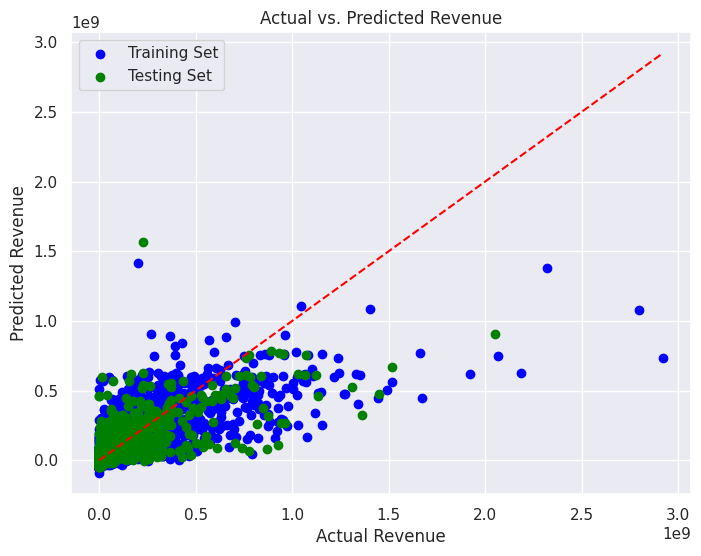

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Assuming predictors variable contains all columns except 'revenue'
predictors = df.drop(columns=['revenue'])

# Assuming outcome variable is 'revenue'
outcome = df['revenue']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) for training and testing data
train_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, y_pred)

print("Linear Regression model - Train MSE:", train_mse)
print("Linear Regression model - Test MSE:", test_mse)

# Plotting actual vs. predicted values for both training and testing sets
plt.figure(figsize=(8, 6))

# Plotting training set
plt.scatter(y_train, model.predict(X_train), color='blue', label='Training Set')

# Plotting testing set
plt.scatter(y_test, y_pred, color='green', label='Testing Set')

# Plotting the diagonal line (perfect prediction)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mean=y_train.mean()
ones=np.ones(len(y_train))
ones=ones*mean
train_meanmse=mean_squared_error(y_train,ones)



mean=y_test.mean()
ones=np.ones(len(y_test))
ones=ones*mean
test_meanmse=mean_squared_error(y_test,ones)


print()
print("Simple baseline model predictions")
print("Train Baseline Mean MSE:" , train_meanmse)
print("Test Baseline Mean MSE:" , test_meanmse)




Simple baseline model predictions
Train Baseline Mean MSE: 2.538207943782218e+16
Test Baseline Mean MSE: 2.5490427484196852e+16


Both MSE of the linear model for both training and testing data are lower than the MSE baseline model (the mean), indicating that the model is providing better predictions than a simple baseline model.

Additionally, the train MSE is lower than the test MSE, which was expected, as in training, we are optimizing with the data we have, while testing has unseen data.


### **LASSO model**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define a range of alpha values to search, 50 is fast enough but also thorough
num_alphas = 50

#with 60, we got a best alpha of 10 and an MSE of 1.280384632236623e+16 (higher than baseline)
#with 100, we get a best alpha of 100 and an MSE of 1.2803837887977272e+16 (slightly lower), showing that a higher
#alpha is better for this model.  (and logspace -5,3)
#with 500, best alpha is 1000 and MSE is 1.2803753778902354e+16 (and logspace -5,3)

alphas = np.logspace(5,18, num_alphas)
#we are also increasing space for alphas to find best alpha, started with -5,1 but showed best alpha of 10,
# -5,1 and alphas 500 showed best alpha of 1000, so increasing space may help us find a better MSE

# Create a dictionary specifying the parameter grid
param_grid = {'alpha': alphas}

# Instantiate Lasso regression model
lasso = Lasso()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)#grid search will be used
#to find optimal alpha

# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value found during the grid search
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Get the best model (trained with the best alpha)
best_model = grid_search.best_estimator_

# Evaluate the best model on the training data
mse_train_best = mean_squared_error(y_train, best_model.predict(X_train_scaled))
print("Train MSE with best alpha:", mse_train_best)

# Evaluate the best model on the testing data
mse_test_best = mean_squared_error(y_test, best_model.predict(X_test_scaled))
print("Test MSE with best alpha:", mse_test_best)


Best alpha: 625055.1925273977
Train MSE with best alpha: 1.1228009505142858e+16
Test MSE with best alpha: 1.2795609645781912e+16


Using CV grid search to find the best alpha gives us a

best alpha of 100000

Test MSE with best alpha:
1.279686011159592e+16

Train MSE with best alpha:
1.120854588413644e+16

Parameters for these values were

alphas = np.logspace(-1,5, 40).

Model is slightly overfitting, as the training set is lower than the test set significantly.

Using

alphas = np.logspace(-1,8, 40)

we get

Best alpha: 837677.6400682924

Test MSE with best alpha:
1.279640161914264e+16

Train MSE with best alpha:
1.123812973888786e+16

Difference: 0.15582718802

We get a better MSE using this parameters, however, model still shows signs of overfitting.


Using

alphas = np.logspace(5,15, 40)

we get

Best alpha: 655128.5568595509

Test MSE with best alpha:
1.2795545558531626e+16

Train MSE with best alpha:
1.1229311116871274e+16

Difference: 0.15662344416

We get a better MSE using this parameters, however, model shows an increase in signs of overfitting.(Bias variance tradeoff)


Best

alphas = np.logspace(5,18, num_alphas)

(afer second prameter is increased, MSE  increases too so optimal limit is 18):

Best alpha: 625055.1925273977

Test MSE with best alpha:
1.2795609645781912e+16

Train MSE with best alpha:
1.1228009505142858e+16

Difference: 0.15676001406

We get a better MSE using this parameters, however, model shows an increase in signs of overfitting.(Bias variance tradeoff)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np

# Define a narrower range of alpha values centered around the previously identified best alpha
best_alpha = 625055.1925273977
alpha_range = np.linspace(best_alpha * 0.8, best_alpha * 1.2, 10)

# Create a dictionary specifying the parameter grid
param_grid = {'alpha': alpha_range}

# Instantiate Lasso regression model
lasso = Lasso()

# Create GridSearchCV object with cross-validation
grid_search_cv = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search with cross-validation on the training data
grid_search_cv.fit(X_train_scaled, y_train)

# Get the best alpha value found during the grid search
best_alpha_cv = grid_search_cv.best_params_['alpha']
print("Best alpha with cross-validation:", best_alpha_cv)

# Get the best model (trained with the best alpha)
best_model_cv = grid_search_cv.best_estimator_

#Training
mse_train_best_cv = mean_squared_error(y_train, best_model_cv.predict(X_train_scaled))
print("Train MSE with best alpha found using cross-validation:", mse_train_best_cv)

# Testing
mse_test_best_cv = mean_squared_error(y_test, best_model_cv.predict(X_test_scaled))
print("Test MSE with best alpha found using cross-validation:", mse_test_best_cv)




Best alpha with cross-validation: 694505.7694748862
Train MSE with best alpha found using cross-validation: 1.1231060232875704e+16
Test MSE with best alpha found using cross-validation: 1.2795634180933116e+16


Found absolute best alpha.

Best alpha with cross-validation:
694505.7694748862


Test MSE with best alpha found using cross-validation:

1.2795634180933116e+16


Train MSE with best alpha found using cross-validation:

1.1231060232875704e+16


Not a significant improvement from the alpha before, in terms of MSE. However, overfitting was decreased slightly.



In [ ]:
print("Train RMSE with best alpha found using cross-validation:", np.sqrt(mse_train_best_cv))
print("Test RMSE with best alpha found using cross-validation:", np.sqrt(mse_test_best_cv))


Train RMSE with best alpha found using cross-validation: 105976696.65013957
Test RMSE with best alpha found using cross-validation: 113117788.96766466


**LASSO CONCLUSION:**

Good model as it beats the simple baseline model, and rmse is in the 100,000 dollars, considering that its is a good revenue prediciton for movie revenues (where revenues often go into the millions and billions).

Could find better model, but LASSO is satisfactory.

### **Ridge**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming predictors variable contains all columns except 'revenue'
predictors = df.drop(columns=['revenue'])

# Assuming outcome variable is 'revenue'
outcome = df['revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, outcome, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of alpha values to search
num_alphas = 50
alphas = np.logspace(-1, 4, num_alphas)

# Create a dictionary specifying the parameter grid
param_grid = {'alpha': alphas}

# Instantiate Ridge regression model
ridge = Ridge()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best alpha value found during the grid search
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Get the best model (trained with the best alpha)
best_model = grid_search.best_estimator_

# Evaluate the best model on the training data
mse_train_best = mean_squared_error(y_train, best_model.predict(X_train_scaled))
print("Train MSE with best alpha:", mse_train_best)

# Evaluate the best model on the testing data
mse_test_best = mean_squared_error(y_test, best_model.predict(X_test_scaled))
print("Test MSE with best alpha:", mse_test_best)

# Perform cross-validation to get a more robust estimate of performance
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
cv_mse_mean = -np.mean(cv_scores)
print("Cross-Validation MSE (mean):", cv_mse_mean)



Best alpha: 44.98432668969444
Train MSE with best alpha: 1.1207027542956398e+16
Test MSE with best alpha: 1.2787053771402052e+16
Cross-Validation MSE (mean): 1.13691948198495e+16


num_alphas = 50

alphas = np.logspace(-1, 3, num_alphas)


Best alpha: 49.417133613238335


Train MSE with best alpha:
1.1207206706721056e+16

Test MSE with best alpha:
1.2785545761414382e+16

Cross-Validation MSE (mean): 1.136918310927362e+16

-------------------------------------
num_alphas = 50

alphas = np.logspace(-1, 4, num_alphas)


Best alpha: 44.98432668969444

Train MSE with best alpha:
1.1207027542956398e+16

Test MSE with best alpha:
1.2787053771402052e+16

Cross-Validation MSE (mean):
1.13691948198495e+16

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define a range of alpha values to search
num_alphas = 50
alphas = np.logspace(-1, 3, num_alphas)

# Define other hyperparameters to tune
param_grid = {
    'alpha': alphas,
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'max_iter': [1,5,10,50,100]
}

# Instantiate Ridge regression model
ridge = Ridge()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model (trained with the best hyperparameters)
best_model = grid_search.best_estimator_

# Evaluate the best model on the training data
mse_train_best = mean_squared_error(y_train, best_model.predict(X_train_scaled))
print("Train MSE with best hyperparameters:", mse_train_best)

# Evaluate the best model on the testing data
mse_test_best = mean_squared_error(y_test, best_model.predict(X_test_scaled))
print("Test MSE with best hyperparameters:", mse_test_best)

# Print mean cross-validation MSE
print("Cross-Validation MSE (mean):", -grid_search.best_score_)


Best hyperparameters: {'alpha': 13.257113655901081, 'max_iter': 10, 'solver': 'sag'}
Train MSE with best hyperparameters: 1.1211264802042652e+16
Test MSE with best hyperparameters: 1.2794838830356162e+16
Cross-Validation MSE (mean): 1.1369167129423876e+16


Best hyperparameters:

{'alpha': 13.257113655901081, 'max_iter': 10, 'solver': 'sag'}

Train MSE with best hyperparameters:
1.1211264802042652e+16

Test MSE with best hyperparameters:
1.2794838830356162e+16

Cross-Validation MSE (mean):
1.1369167129423876e+16

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define a range of alpha values to search
num_alphas = 50
alphas = np.logspace(-1, 3, num_alphas)

# Define other hyperparameters to tune
param_grid = {
    'alpha': alphas,
    'solver': ['auto'],
    'max_iter': [1,2,3,5,8,10]
}

# Instantiate Ridge regression model
ridge = Ridge()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model (trained with the best hyperparameters)
best_model = grid_search.best_estimator_

# Evaluate the best model on the training data
mse_train_best = mean_squared_error(y_train, best_model.predict(X_train_scaled))
print("Train MSE with best hyperparameters:", mse_train_best)

# Evaluate the best model on the testing data
mse_test_best = mean_squared_error(y_test, best_model.predict(X_test_scaled))
print("Test MSE with best hyperparameters:", mse_test_best)

# Print mean cross-validation MSE
print("Cross-Validation MSE (mean):", -grid_search.best_score_)

Best hyperparameters: {'alpha': 49.417133613238335, 'max_iter': 1, 'solver': 'auto'}
Train MSE with best hyperparameters: 1.1207206706721056e+16
Test MSE with best hyperparameters: 1.2785545761414382e+16
Cross-Validation MSE (mean): 1.136918310927362e+16


Best hyperparameters: {'alpha': 49.417133613238335, 'max_iter': 1, 'solver': 'auto'}
Train MSE with best hyperparameters: 1.1207206706721056e+16
Test MSE with best hyperparameters: 1.2785545761414382e+16
Cross-Validation MSE (mean): 1.136918310927362e+16


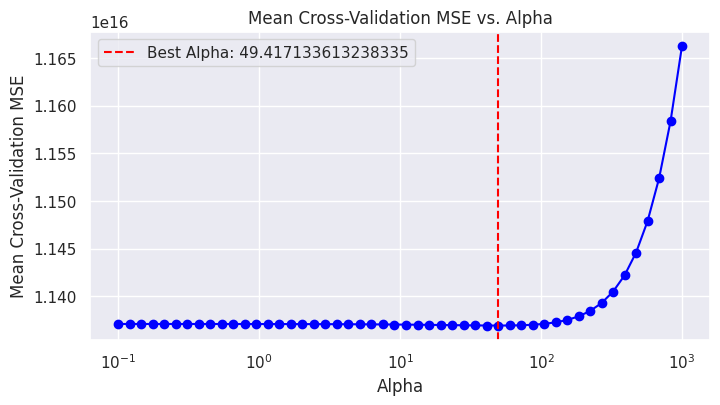

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define a range of alpha values to search
num_alphas = 50
alphas = np.logspace(-1, 3, num_alphas)

# Define other hyperparameters to tune
param_grid = {
    'alpha': alphas,
    'solver': ['auto'],
    'max_iter': [1]
}

# Instantiate Ridge regression model
ridge = Ridge()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters found during the grid search
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Get the best model (trained with the best hyperparameters)
best_model = grid_search.best_estimator_

# Evaluate the best model on the training data
mse_train_best = mean_squared_error(y_train, best_model.predict(X_train_scaled))
print("Train MSE with best hyperparameters:", mse_train_best)

# Evaluate the best model on the testing data
mse_test_best = mean_squared_error(y_test, best_model.predict(X_test_scaled))
print("Test MSE with best hyperparameters:", mse_test_best)

# Print mean cross-validation MSE
print("Cross-Validation MSE (mean):", -grid_search.best_score_)
# Extract mean cross-validation MSE from the grid search results
cv_mse = -grid_search.cv_results_['mean_test_score']




# Extract mean cross-validation MSE from the grid search results
cv_mse = -grid_search.cv_results_['mean_test_score']

# Plot alpha values against mean cross-validation MSE
plt.figure(figsize=(8, 4))
plt.plot(alphas, cv_mse, marker='o', color='blue', linestyle='-')
plt.title('Mean Cross-Validation MSE vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('Mean Cross-Validation MSE')
plt.xscale('log')
plt.grid(True)

# Highlight the best alpha
best_alpha = best_params['alpha']
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Best Alpha: {best_alpha}')
plt.legend()

plt.show()

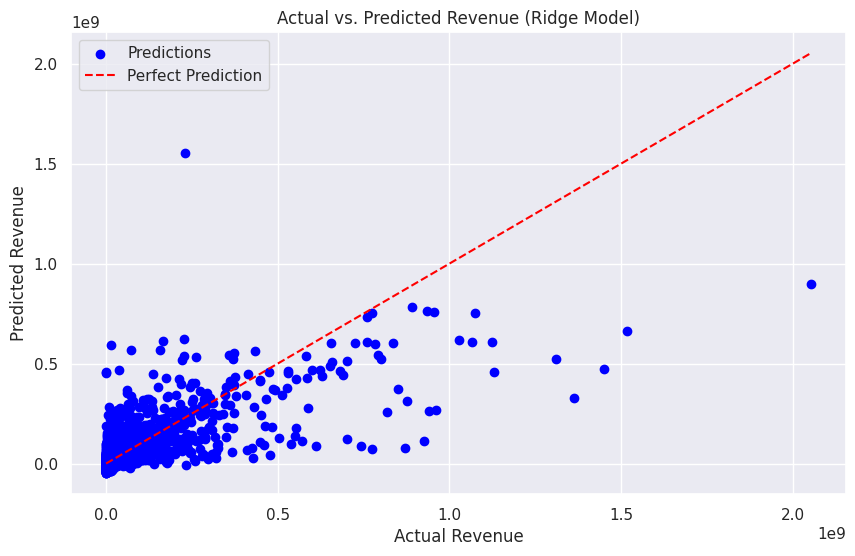

In [ ]:
# Train the Ridge model with the best alpha
ridge_model = Ridge(alpha=49.417133613238335)  # Use the best alpha obtained from grid search
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Revenue (Ridge Model)')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.legend()
plt.grid(True)
plt.show()

Ridge is slightly better than LASSO (not much). Ridge takes into account ALL predictors, LASSO straight up sets them to 0 if it thinks they do not hold too much predictive power. In this case, Ridge takes a more 'holistic' approach, which may be why, by taking into account all variables, performs a little bit better.

Additionally, Ridge regression is less sensitive to variations in the scale of features compared to Lasso regression. This means that the performance of Ridge regression is less affected by differences in the scales of features in the dataset.
